In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, sys, platform
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

In [2]:
print(os.getcwd())
import os
data = pd.read_csv(r'C:\Users\bpandey1\Downloads\ml\winequality-red.csv',sep=';')
data.info()

C:\Users\bpandey1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
##checking missing values in the dataset
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
X = data.drop('quality', axis=1)
y = data['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 # Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(y_train)
print(X_train)

493     6
354     6
342     6
834     5
705     5
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1279, dtype: int64
[[ 0.21852997  0.90601191  0.20039205 ...  1.09426457  0.48302886
   1.10483337]
 [-1.27524919 -1.77549685  0.66254621 ... -0.39596939 -0.40216729
   1.38643512]
 [ 1.48249695 -0.76993107  1.02199944 ... -0.07200549  0.54204194
  -0.58477711]
 ...
 [-0.6432657   0.51495855 -1.08336951 ...  1.28864292 -0.69723268
  -0.86637886]
 [-0.24109439 -1.83136161  0.4057939  ...  0.05758008  0.83710732
   1.38643512]
 [-1.44760832 -1.32857872 -0.05636026 ...  0.51112954 -0.69723268
   2.8883111 ]]


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

accuracy_rf= accuracy_score(y_test, rf_pred)
print(f"accuracy without optimization: {accuracy_rf}")
r2_score= r2(y_test, rf_pred)
print(f"r2 score without optimization): {r2_score}")
print(y_test[0:20])
print(rf_pred[0:20])

accuracy without optimization: 0.65
r2 score without optimization): 0.3496615311047685
803     6
124     5
350     6
682     5
1326    6
976     5
1493    5
706     5
613     5
1587    6
513     7
1505    3
1525    5
1568    5
220     6
1010    7
30      5
942     7
481     8
135     5
Name: quality, dtype: int64
[5 5 5 5 6 5 5 5 6 6 7 5 6 5 6 6 5 6 7 5]


In [13]:
def rf_eval(n_estimators, max_depth, min_samples_leaf, min_samples_split):
    model = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_leaf=int(min_samples_leaf),
        min_samples_split=int(min_samples_split),
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    accuracy_score= r2(y_test, y_pred)
    return np.mean(accuracy_score)  

# Bayesian Optimization

In [14]:
pbounds = {
    'n_estimators': (50,400),
    'max_depth': (10,30),
    'min_samples_leaf': (1,5),
    'min_samples_split':(2,11),

}
max_features={'sqrt', 'log2'}

optimizer = BayesianOptimization(
    f=rf_eval,
    pbounds=pbounds,
    random_state=42,
)

optimizer.maximize(init_points=5, n_iter=20)


|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.3736    | 17.49     | 4.803     | 8.588     | 259.5     |
| 2         | 0.4023    | 13.12     | 1.624     | 2.523     | 353.2     |
| 3         | 0.3784    | 22.02     | 3.832     | 2.185     | 389.5     |
| 4         | 0.3831    | 26.65     | 1.849     | 3.636     | 114.2     |
| 5         | 0.3927    | 16.08     | 3.099     | 5.888     | 151.9     |
| 6         | 0.3831    | 13.12     | 2.078     | 2.899     | 352.8     |
| 7         | 0.3784    | 10.98     | 1.074     | 7.405     | 303.3     |
| 8         | 0.3544    | 10.09     | 1.161     | 6.198     | 173.2     |
| 9         | 0.407     | 16.81     | 2.947     | 5.559     | 150.9     |
| 10        | 0.364     | 19.43     | 1.642     | 9.218     | 83.78     |
| 11        | 0.407     | 17.03     | 2.218     | 5.586     | 151.8     |
| 12        | 0.4023    | 17.78     | 

Best configuration from Bayesian Optimization: {'target': 0.41660813819692466, 'params': {'max_depth': 16.799830702400662, 'min_samples_leaf': 2.64652380331238, 'min_samples_split': 6.686208548504791, 'n_estimators': 151.122143197343}}
accuracy after HPO: 0.665625
r2 score: 0.41660813819692466


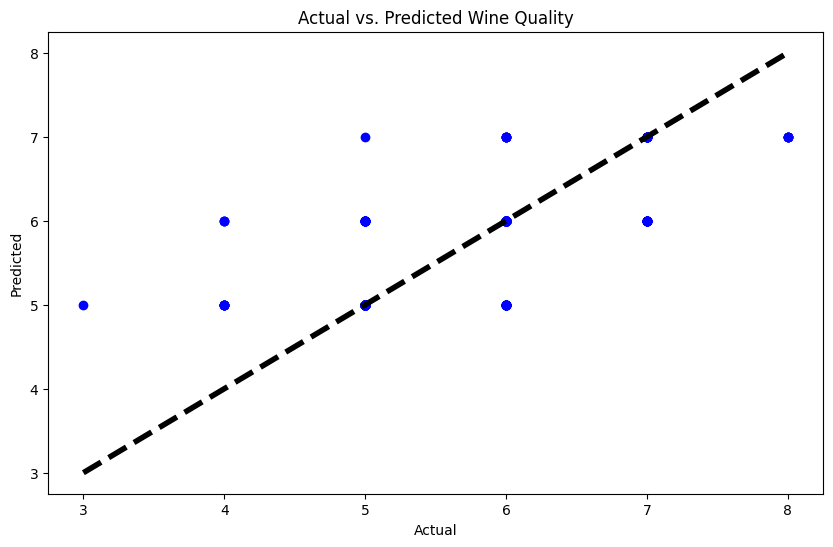

In [15]:
print("Best configuration from Bayesian Optimization:", optimizer.max)

best_params = optimizer.max['params']
model = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    min_samples_split= int(best_params['min_samples_split']),
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate on the test set
predictions = model.predict(X_test)
accuracy1= accuracy_score(y_test, predictions)
#mse = mean_squared_error(y_test, predictions)
r2_score=r2(y_test, predictions)
print(f"accuracy after HPO: {accuracy1}")
print(f"r2 score: {r2_score}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Wine Quality')
plt.show()


svm_classifier = SVC(kernel='linear', C=1.0) 
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Randomized Search for RF and SVM

In [18]:
###RANDOMIZED Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, StratifiedKFold
import numpy as np
import scipy.stats as stats

# Define the models
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(),
    'SVM': SVC()
}

# Define the parameter distributions for RandomizedSearchCV
param_dists = {
    'Random Forest Classifier': {
        'n_estimators': stats.randint(50, 400),
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': stats.randint(2, 11),
        'min_samples_leaf': stats.randint(1, 5)
    },
    'SVM': {
        'C': stats.uniform(0.1, 10),
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }
}


outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


final_scores = {}

for clf_name, clf in classifiers.items():
    param_dist = param_dists[clf_name]
   

    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(clf, param_dist, cv=inner_cv, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
   
    # Outer cross-validation results
    cv_scores = cross_val_score(random_search, X_train, y_train, cv=outer_cv)
   
    # Training the best model found by the randomized search
    best_model = random_search.fit(X_train, y_train).best_estimator_
   
    # Calculate test score
    test_score = best_model.score(X_test, y_test)
   
    # it stores test score
    final_scores[clf_name] = test_score
   
    print(f"Nested Cross-Validation for {clf_name}:")
    print(f"Best Hyperparameters: {best_model.get_params()}")
    print(f"Cross-Validation Accuracy score: {np.mean(cv_scores):.4f}")
    print(f"Test Score: {test_score:.4f}\n")

# Finding the the best model
best_model = max(final_scores, key=final_scores.get)

# Printing final accuracies and the best model
for name, accuracy in final_scores.items():
    print(f"{name} Accuracy: {accuracy}")

print("Best Model:", best_model, final_scores[best_model])


Nested Cross-Validation for Random Forest Classifier:
Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 104, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Cross-Validation Accuracy score: 0.6630
Test Score: 0.6625

Nested Cross-Validation for SVM:
Best Hyperparameters: {'C': 7.41993941811405, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Cross-Validation Accuracy score: 0.5809
Test Score: 0.5625

Random Forest Classifier Accuracy: 0.6625
SVM Accuracy: 0.5625

In [12]:
#y_pred = best_model.predict(X_test)

    # Calculate MSE on the test set
#mse_test = mean_squared_error(y_test, y_pred)

#print(f"{RandomForest} Test MSE: {mse_test:.4f}\n")

Bayesian Optimization for SVM

In [12]:
##Bayesian for SVM
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

data = pd.read_csv(r'C:\Users\bpandey1\Downloads\ml\winequality-red.csv',sep=';')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for Bayesian optimization
param_grid = {
    'C': Real(0.1, 10, prior='log-uniform'),
    'kernel': Categorical(['linear', 'rbf', 'poly', 'sigmoid'])
}

svr = SVC()

# BayesSearchCV for hyperparameter tuning
opt = BayesSearchCV(
    svr,
    param_grid,
    n_iter=10,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

opt.fit(X_train, y_train)
best_svr = opt.best_estimator_
best_params = opt.best_params_

# Making predictions on the test set
y_pred = best_svr.predict(X_test)

accuracy_svm= accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"accuracy: {accuracy_svm:.4f}")


Best Hyperparameters: OrderedDict([('C', 4.2149456283335), ('kernel', 'linear')])
accuracy: 0.5656


#################References######################
#####Probst, Philipp, Marvin N. Wright, and Anne‐Laure Boulesteix. "Hyperparameters and tuning strategies for random forest." Wiley Interdisciplinary Reviews: data mining and knowledge discovery 9.3 (2019): e1301.
#######Sumathi, B. "Grid search tuning of hyperparameters in random forest classifier for customer feedback sentiment prediction." International Journal of Advanced Computer Science and Applications 11.9 (2020).
#########https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f
############https://ekamperi.github.io/machine%20learning/2021/05/08/bayesian-optimization.html
##############https://youtu.be/5nYqK-HaoKY?si=EXa9HFHjUEVAKC5f
